<a href="https://colab.research.google.com/github/Yab112/-repo/blob/main/kmeans_coursera_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
data = pd.read_csv("/content/drive/My Drive/yab/flight_csv_file/1fXr31hcEemkYxLyQ1aU1g_50fc36ee697c4b158fe26ade3ec3bc24_Banknote-authentication-dataset-.csv")

data.iloc[:,0].shape == data.iloc[:,1].shape


True

In [19]:
data.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


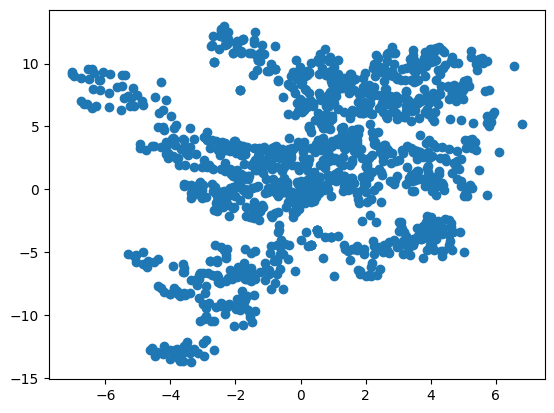

In [20]:
plt.scatter(data.V1,data.V2)

In [18]:
mdl = KMeans(n_clusters = 2,random_state = 0)

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_data[:,0].shape == data.iloc[:,1].shape

True

In [19]:
fited_model = mdl.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
fited_model.cluster_centers_.tolist()

[[0.6572269311077227, 0.48757904573693767],
 [-0.8481409311289984, -0.629213025633811]]

In [12]:
data = scaler.inverse_transform(data)

In [29]:
data

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [31]:
data.iloc[:,1].shape == data.iloc[:,1].shape

True

In [41]:
cluster_labels = fited_model.labels_
cluster_centers = mdl.cluster_centers_.tolist()
cluster_center_ = np.array(cluster_centers)
cluster_center = scaler.inverse_transform(cluster_center_)
cluster_center[:,0]

array([ 2.30139438, -1.97644922])

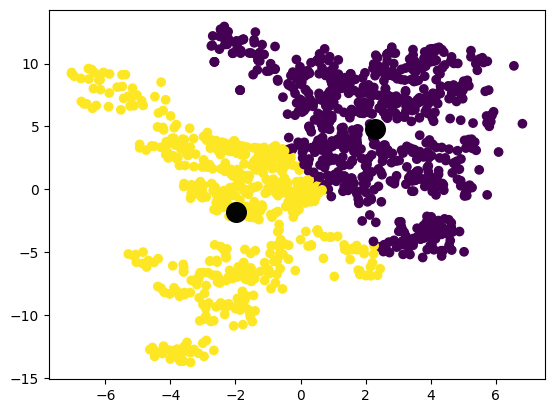

In [50]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=cluster_labels, cmap='viridis')
plt.scatter(cluster_center[:,0], cluster_center[:,1], c='black', marker='o', s=199, label='Cluster Centers',alpha = 0.99)

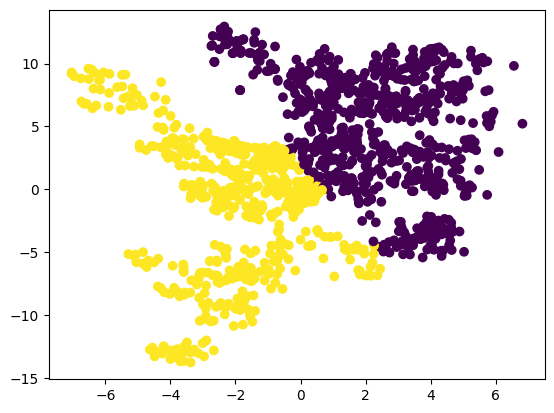

In [43]:
plt.scatter(data.V1,data.V2,c=cluster_labels, cmap='viridis')